In [8]:
import pandas as pd
import seaborn as sn

In [14]:
df = pd.read_csv("./thermography-E5D608D31715.csv",sep=" ")
df.shape

(4799, 320)

<Axes: >

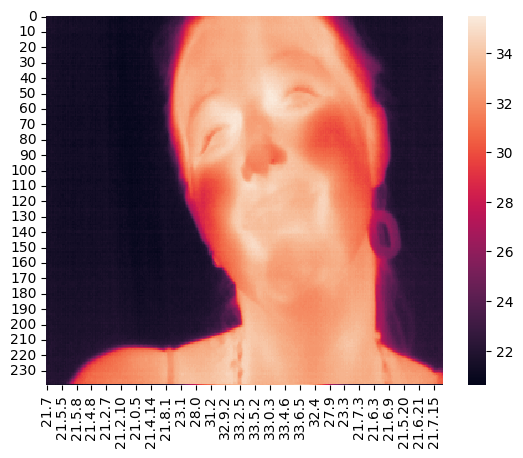

In [15]:
sn.heatmap(df.head(240))